In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [21]:
#loading the data of the python classifiers

sess3 = pd.read_csv(r"C:\Users\map92fg\Documents\Software\P300_Classification\data_thesis\Classsifier_Results\accuracies_swlda.csv")

# renaming sess3ions so that the Session number corresponds to the measuring day

dic = dict(zip(sess3["Session"].unique(),list(range(1,40))))
sess3["Session"] = sess3["Session"].replace(dic)

#loading the BCI2000 data from a text file

bci2k = pd.read_fwf(r"C:\Users\map92fg\Documents\Software\P300_Classification\data_thesis\Classsifier_Results\bci2000_sessionwise.txt",header=None)[[0,1]].to_numpy()
temp_df = pd.DataFrame(columns=["Accuracy", "Classifier", "Session", "Ep2Avg"])
temp_df["Accuracy"] = bci2k[:,1]*0.01
temp_df["Classifier"] = "BCI2000"
temp_df["Session"] =  [i for i in range(1,int(len(bci2k)/8)+1) for _ in range(8)]
temp_df["Ep2Avg"] = bci2k[:,0]
temp_df

# concatation of the dataframes and added the attribute calibration mode and ITR

sess3 = sess3.append(temp_df)
sess3["Calibration"] = "sess3"
sess3

,Accuracy,Classifier,Session,Ep2Avg,Calibration
0,0.277778,SWLDA,1,1,sess3
1,0.222222,SWLDA,1,2,sess3
2,0.166667,SWLDA,1,3,sess3
3,0.000000,SWLDA,1,4,sess3
4,0.111111,SWLDA,1,5,sess3
...,...,...,...,...,...
307,0.610000,BCI2000,39,4,sess3
308,0.610000,BCI2000,39,5,sess3
309,0.610000,BCI2000,39,6,sess3
310,0.610000,BCI2000,39,7,sess3


In [22]:
swlda = sess3.loc[(sess3.Classifier=="SWLDA") & (sess3.Ep2Avg ==8)]
bci2000 = sess3.loc[(sess3.Classifier=="BCI2000") & (sess3.Ep2Avg ==8)]


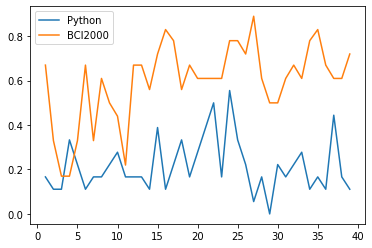

In [23]:
fig,ax = plt.subplots()
ax.plot(swlda.Session,swlda.Accuracy,label="Python")
ax.plot(bci2000.Session,bci2000.Accuracy, label="BCI2000")
plt.legend()
plt.savefig(r"C:\Users\map92fg\Documents\Software\P300_Classification\data_thesis\Classsifier_Results\python_swlda.png")